**Importing the Required Packages!**

In [64]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Sequential, Model
from matplotlib.pyplot import imshow
import numpy as np
import cv2

from keras.preprocessing.image import img_to_array
np.random.seed(42)

**Mounting the google drive to access images**

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


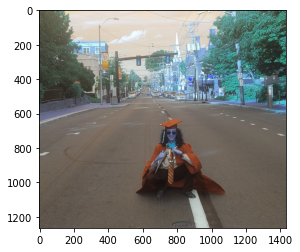

In [51]:
SIZE = 256
img_data = []
img = cv2.imread('/content/drive/MyDrive/matt_UD_grad1.jpg',1) #imports as BGR
imshow(img)

**Convert to RGB**

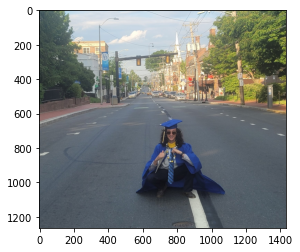

In [52]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
imshow(img)

**Resize**

In [53]:
img = cv2.resize(img,(SIZE,SIZE))
img_data.append(img_to_array(img))

print("The size of the image array is:",img_to_array(img).shape)
print("The values are:", img_to_array(img))

The size of the image array is: (256, 256, 3)
The values are: [[[ 75.  95.  94.]
  [ 74.  92.  94.]
  [ 77. 100.  97.]
  ...
  [ 60.  77.  23.]
  [ 98. 120.  48.]
  [129. 149.  77.]]

 [[ 81. 101. 102.]
  [ 79.  98. 101.]
  [ 72.  93.  93.]
  ...
  [ 78.  96.  35.]
  [ 95. 116.  58.]
  [145. 167.  94.]]

 [[ 72.  93.  96.]
  [ 87. 104. 112.]
  [ 72.  91.  95.]
  ...
  [103. 116.  44.]
  [ 66.  82.  24.]
  [ 82.  99.  57.]]

 ...

 [[ 78.  87.  96.]
  [ 71.  79.  89.]
  [ 69.  78.  87.]
  ...
  [ 81.  94. 103.]
  [ 80.  94. 103.]
  [ 80.  90.  99.]]

 [[ 74.  84.  93.]
  [ 81.  90.  99.]
  [ 76.  85.  94.]
  ...
  [ 79.  92. 101.]
  [ 82.  94. 103.]
  [ 75.  85.  94.]]

 [[ 76.  85.  94.]
  [ 83.  92. 100.]
  [ 79.  88.  96.]
  ...
  [ 73.  86.  95.]
  [ 78.  88.  98.]
  [ 76.  86.  95.]]]


**Reshape**

In [56]:
img_array = np.reshape(img_data,(len(img_data),SIZE,SIZE,3))
print("The size of the image array is:", img_array.shape , "\nWhere the first component in the shape would be (n,256,256,3) for n input images")
print("The values are: ", img_array)
img_array = img_array.astype('float32')/255. #maximum rgb value is 255, normalize them!
print("The updated values After Normalization: ", img_array)

The size of the image array is: (1, 256, 256, 3) 
Where the first component in the shape would be (n,256,256,3) for n input images
The values are:  [[[[ 75.  95.  94.]
   [ 74.  92.  94.]
   [ 77. 100.  97.]
   ...
   [ 60.  77.  23.]
   [ 98. 120.  48.]
   [129. 149.  77.]]

  [[ 81. 101. 102.]
   [ 79.  98. 101.]
   [ 72.  93.  93.]
   ...
   [ 78.  96.  35.]
   [ 95. 116.  58.]
   [145. 167.  94.]]

  [[ 72.  93.  96.]
   [ 87. 104. 112.]
   [ 72.  91.  95.]
   ...
   [103. 116.  44.]
   [ 66.  82.  24.]
   [ 82.  99.  57.]]

  ...

  [[ 78.  87.  96.]
   [ 71.  79.  89.]
   [ 69.  78.  87.]
   ...
   [ 81.  94. 103.]
   [ 80.  94. 103.]
   [ 80.  90.  99.]]

  [[ 74.  84.  93.]
   [ 81.  90.  99.]
   [ 76.  85.  94.]
   ...
   [ 79.  92. 101.]
   [ 82.  94. 103.]
   [ 75.  85.  94.]]

  [[ 76.  85.  94.]
   [ 83.  92. 100.]
   [ 79.  88.  96.]
   ...
   [ 73.  86.  95.]
   [ 78.  88.  98.]
   [ 76.  86.  95.]]]]
The updated values After Normalization:  [[[[0.29411766 0.37254903 0.3

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',padding='same', input_shape=(SIZE,SIZE,3))) #First Layer image must be in a 256,256,3 array
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))


model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model.add(UpSampling2D((2,2)))
model.add(Conv2D(3,(3,3),activation='relu',padding='same'))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model.summary()

In [66]:
from keras.utils.vis_utils import plot_model

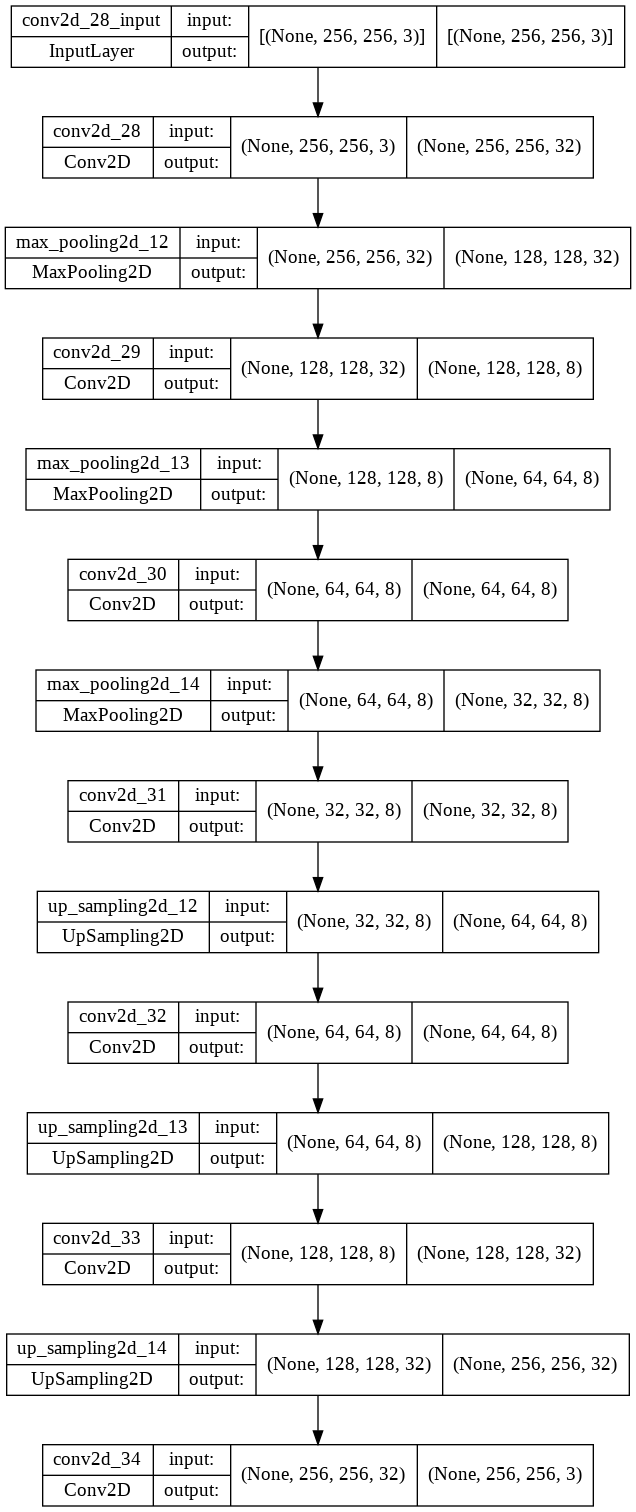

In [67]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

**50 Epochs**

Epoch 1/5
1/1 [==============================] - 0s 229ms/step - loss: 0.1469 - accuracy: 0.1594
Epoch 2/5
1/1 [==============================] - 0s 229ms/step - loss: 0.1229 - accuracy: 0.1600
Epoch 3/5
1/1 [==============================] - 0s 242ms/step - loss: 0.1022 - accuracy: 0.1601
Epoch 4/5
1/1 [==============================] - 0s 222ms/step - loss: 0.0841 - accuracy: 0.1601
Epoch 5/5
1/1 [==============================] - 0s 225ms/step - loss: 0.0654 - accuracy: 0.1602


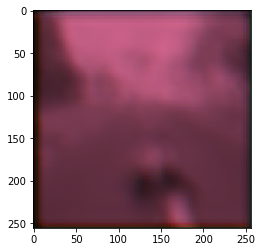

In [59]:
model.fit(img_array,img_array,epochs =5 , shuffle=True) #do we want to shuffle the data before each epoch
pred = model.predict(img_array)
imshow(pred[0].reshape(SIZE,SIZE,3))

**500 Epochs**

Epoch 1/500
1/1 [==============================] - 0s 260ms/step - loss: 0.0468 - accuracy: 0.1603
Epoch 2/500
1/1 [==============================] - 0s 219ms/step - loss: 0.0315 - accuracy: 0.1661
Epoch 3/500
1/1 [==============================] - 0s 242ms/step - loss: 0.0236 - accuracy: 0.1991
Epoch 4/500
1/1 [==============================] - 0s 230ms/step - loss: 0.0255 - accuracy: 0.6074
Epoch 5/500
1/1 [==============================] - 0s 237ms/step - loss: 0.0317 - accuracy: 0.6196
Epoch 6/500
1/1 [==============================] - 0s 237ms/step - loss: 0.0338 - accuracy: 0.6270
Epoch 7/500
1/1 [==============================] - 0s 258ms/step - loss: 0.0310 - accuracy: 0.6227
Epoch 8/500
1/1 [==============================] - 0s 243ms/step - loss: 0.0272 - accuracy: 0.5955
Epoch 9/500
1/1 [==============================] - 0s 232ms/step - loss: 0.0252 - accuracy: 0.2417
Epoch 10/500
1/1 [==============================] - 0s 230ms/step - loss: 0.0253 - accuracy: 0.1974
Epoch 11/

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


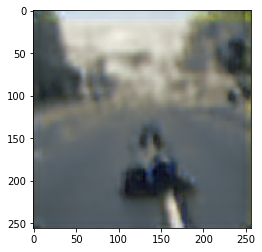

In [60]:
model.fit(img_array,img_array,epochs =500 , shuffle=True) #do we want to shuffle the data before each epoch
pred = model.predict(img_array)
imshow(pred[0].reshape(SIZE,SIZE,3))

**1000 EPochs**

Epoch 1/1000
1/1 [==============================] - 0s 245ms/step - loss: 0.0077 - accuracy: 0.6539
Epoch 2/1000
1/1 [==============================] - 0s 275ms/step - loss: 0.0077 - accuracy: 0.6518
Epoch 3/1000
1/1 [==============================] - 0s 258ms/step - loss: 0.0077 - accuracy: 0.6536
Epoch 4/1000
1/1 [==============================] - 0s 239ms/step - loss: 0.0077 - accuracy: 0.6531
Epoch 5/1000
1/1 [==============================] - 0s 232ms/step - loss: 0.0077 - accuracy: 0.6533
Epoch 6/1000
1/1 [==============================] - 0s 245ms/step - loss: 0.0077 - accuracy: 0.6542
Epoch 7/1000
1/1 [==============================] - 0s 236ms/step - loss: 0.0077 - accuracy: 0.6530
Epoch 8/1000
1/1 [==============================] - 0s 237ms/step - loss: 0.0077 - accuracy: 0.6555
Epoch 9/1000
1/1 [==============================] - 0s 239ms/step - loss: 0.0077 - accuracy: 0.6527
Epoch 10/1000
1/1 [==============================] - 0s 248ms/step - loss: 0.0077 - accuracy: 0.6565

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


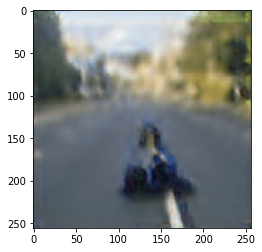

In [61]:
model.fit(img_array,img_array,epochs =1000 , shuffle=True) #do we want to shuffle the data before each epoch
pred = model.predict(img_array)
imshow(pred[0].reshape(SIZE,SIZE,3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


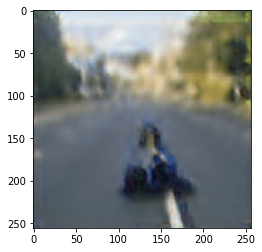

In [62]:
pred1 = model.predict(img_array)
imshow(pred1[0].reshape(SIZE,SIZE,3))

**1500 Epochs**

Epoch 1/1500
1/1 [==============================] - 0s 266ms/step - loss: 0.0059 - accuracy: 0.8150
Epoch 2/1500
1/1 [==============================] - 0s 247ms/step - loss: 0.0059 - accuracy: 0.8146
Epoch 3/1500
1/1 [==============================] - 0s 247ms/step - loss: 0.0059 - accuracy: 0.8155
Epoch 4/1500
1/1 [==============================] - 0s 241ms/step - loss: 0.0059 - accuracy: 0.8143
Epoch 5/1500
1/1 [==============================] - 0s 229ms/step - loss: 0.0059 - accuracy: 0.8168
Epoch 6/1500
1/1 [==============================] - 0s 246ms/step - loss: 0.0059 - accuracy: 0.8146
Epoch 7/1500
1/1 [==============================] - 0s 259ms/step - loss: 0.0059 - accuracy: 0.8158
Epoch 8/1500
1/1 [==============================] - 0s 293ms/step - loss: 0.0058 - accuracy: 0.8158
Epoch 9/1500
1/1 [==============================] - 0s 243ms/step - loss: 0.0058 - accuracy: 0.8154
Epoch 10/1500
1/1 [==============================] - 0s 244ms/step - loss: 0.0058 - accuracy: 0.8154

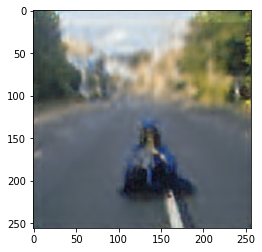

In [68]:
model.fit(img_array,img_array,epochs =1500 , shuffle=True) #do we want to shuffle the data before each epoch
pred = model.predict(img_array)
imshow(pred[0].reshape(SIZE,SIZE,3))

In [70]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

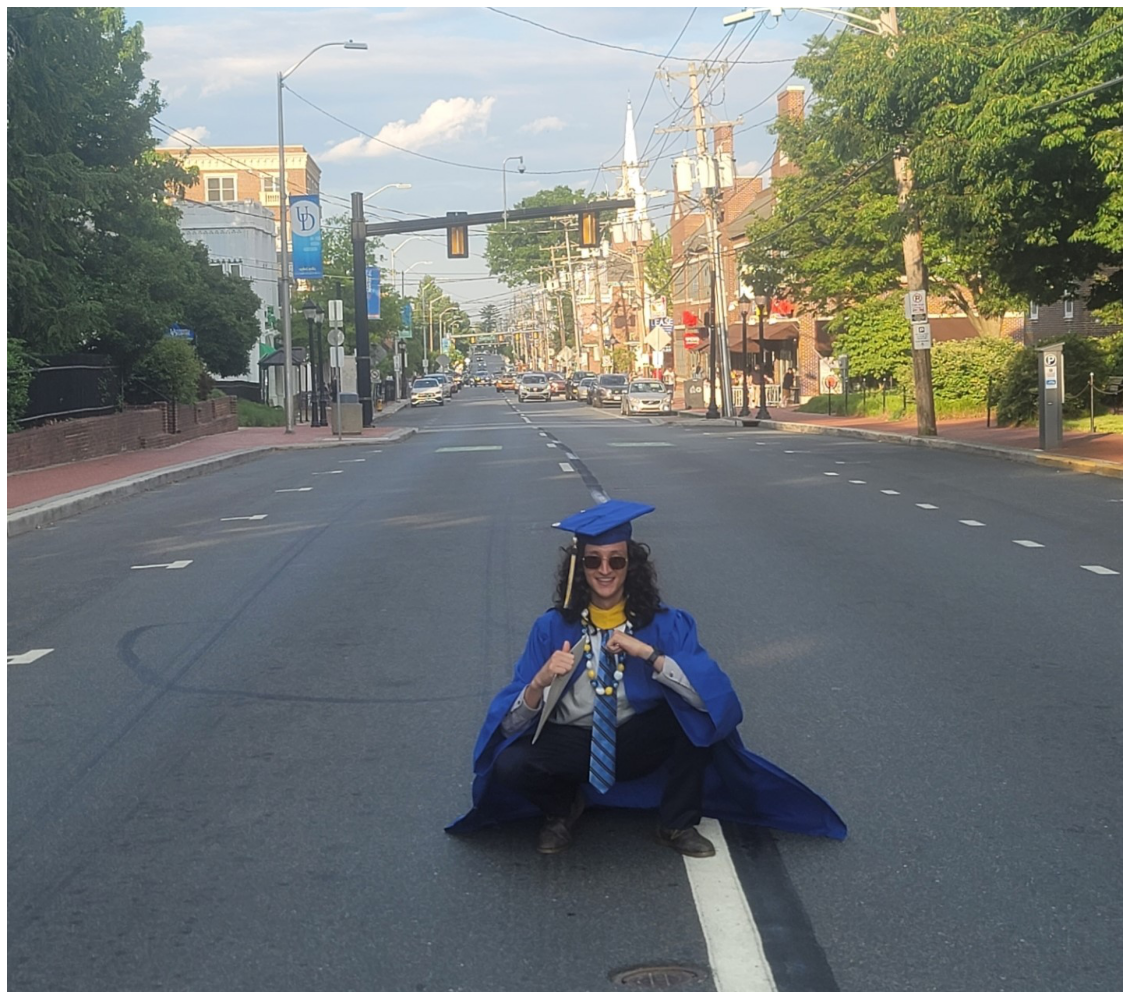

Original order of the image tensor: (1264, 1432, 3)


In [71]:
## Following code has been copied from Week 1 notebook
pix = mpimg.imread('/content/drive/MyDrive/matt_UD_grad1.jpg') # OR BabyYodaDoll.jpg, BabyYodaXmas

plt.figure(figsize=(20,30))
plt.axis('off') # you do not want to see the axes.
plt.imshow(pix)
plt.show()
dim = pix.shape
print ("Original order of the image tensor:", dim)

In [72]:
pix_rgb = pix/255.0;
U0,S0,V0 = np.linalg.svd(pix_rgb[...,0]);
U1,S1,V1 = np.linalg.svd(pix_rgb[...,1]);
U2,S2,V2 = np.linalg.svd(pix_rgb[...,2]);

In [73]:
S0.shape
print(S0[100:110])

[5.23652454 5.20825588 5.18169662 5.14879422 5.10551113 5.08297795
 5.01743357 4.98844559 4.96462087 4.93391683]


In [78]:
## Reconstruction of the image from fewer components from the SVD
pix_compressed = np.zeros_like(pix_rgb);
k=200
pix_compressed[...,0] = np.dot(U0[:,:k], V0[:k,:]*S0[:k].reshape(k,1));
pix_compressed[...,1] = np.dot(U1[:,:k], V1[:k,:]*S1[:k].reshape(k,1));
pix_compressed[...,2] = np.dot(U2[:,:k], V2[:k,:]*S2[:k].reshape(k,1));

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


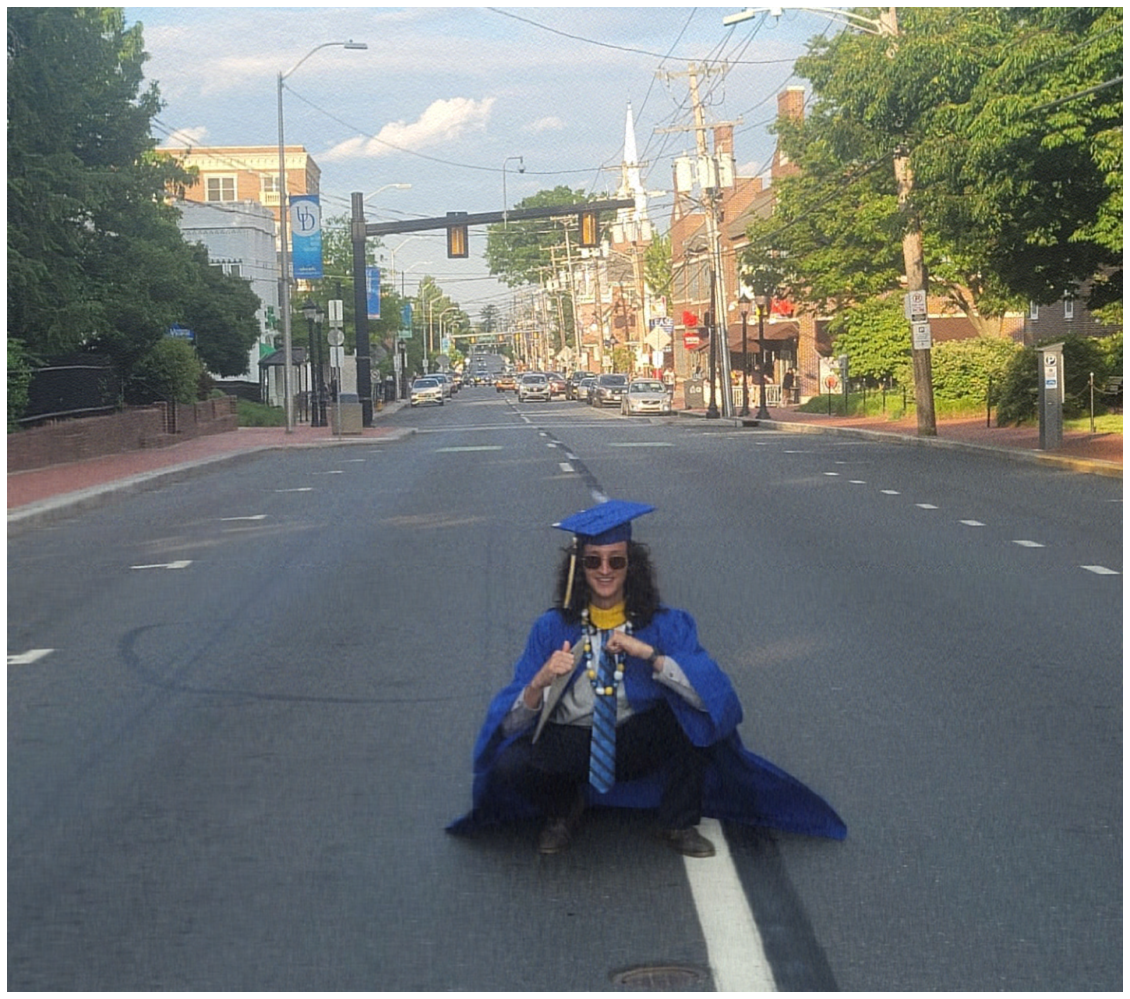

In [79]:
## Display the reconstructed images
plt.figure(figsize=(20,30))
plt.axis('off')
plt.imshow(pix_compressed)
plt.show()

# **Training a model with SVD**

In [80]:
img_data1 = []
pix_compressed = cv2.resize(pix_compressed,(SIZE,SIZE))
img_data1.append(pix_compressed)

print("The size of the image array is:",pix_compressed.shape)
print("The values are:", pix_compressed)

img_array1 = np.reshape(img_data1,(len(img_data1),SIZE,SIZE,3))
print("The size of the image array is:", img_array1.shape , "\nWhere the first component in the shape would be (n,256,256,3) for n input images")
print("The values are: ", img_array1)
img_array1 = img_array.astype('float32')/255. #maximum rgb value is 255, normalize them!
print("The updated values After Normalization: ", img_array1)

The size of the image array is: (256, 256, 3)
The values are: [[[0.28646779 0.36844329 0.37227885]
  [0.31755208 0.38525928 0.39472512]
  [0.29090593 0.38385992 0.37752261]
  ...
  [0.27739744 0.34217229 0.14782569]
  [0.39010505 0.473167   0.19035587]
  [0.51127608 0.57688038 0.28319918]]

 [[0.31038675 0.39506899 0.39138357]
  [0.30443204 0.37668342 0.39228696]
  [0.28967103 0.3705144  0.36290695]
  ...
  [0.31610168 0.39432528 0.13823232]
  [0.36988709 0.46260809 0.24843129]
  [0.53929571 0.62380825 0.35243389]]

 [[0.30268116 0.38046311 0.38492452]
  [0.31353741 0.38540397 0.40404486]
  [0.27939974 0.35380635 0.37615588]
  ...
  [0.43904638 0.50942455 0.22979191]
  [0.32542323 0.387185   0.13958819]
  [0.33077264 0.38639754 0.21165519]]

 ...

 [[0.29583611 0.33161291 0.36522705]
  [0.2955546  0.33193646 0.36378034]
  [0.28634238 0.32177912 0.35396138]
  ...
  [0.28827571 0.3366611  0.37300356]
  [0.32532677 0.38366806 0.42093228]
  [0.32098275 0.36662899 0.39836756]]

 [[0.2993233

In [ ]:
model1 = Sequential()
model1.add(Conv2D(32,(3,3),activation='relu',padding='same', input_shape=(SIZE,SIZE,3))) #First Layer image must be in a 256,256,3 array
model1.add(MaxPooling2D((2,2),padding='same'))
model1.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model1.add(MaxPooling2D((2,2),padding='same'))
model1.add(Conv2D(8,(3,3),activation='relu',padding='same'))


model1.add(MaxPooling2D((2,2),padding='same'))

model1.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model1.add(UpSampling2D((2,2)))
model1.add(Conv2D(8,(3,3),activation='relu',padding='same'))
model1.add(UpSampling2D((2,2)))
model1.add(Conv2D(32,(3,3),activation='relu',padding='same'))
model1.add(UpSampling2D((2,2)))
model1.add(Conv2D(3,(3,3),activation='relu',padding='same'))

model1.compile(optimizer='adam',loss='mean_squared_error',metrics=['accuracy'])
model1.summary()

Epoch 1/1000
1/1 [==============================] - 0s 237ms/step - loss: 0.1370 - accuracy: 0.6421
Epoch 2/1000
1/1 [==============================] - 0s 215ms/step - loss: 0.0904 - accuracy: 0.6385
Epoch 3/1000
1/1 [==============================] - 0s 216ms/step - loss: 0.0550 - accuracy: 0.6224
Epoch 4/1000
1/1 [==============================] - 0s 214ms/step - loss: 0.0434 - accuracy: 0.2102
Epoch 5/1000
1/1 [==============================] - 0s 221ms/step - loss: 0.0548 - accuracy: 0.2034
Epoch 6/1000
1/1 [==============================] - 0s 240ms/step - loss: 0.0477 - accuracy: 0.2140
Epoch 7/1000
1/1 [==============================] - 0s 322ms/step - loss: 0.0401 - accuracy: 0.5648
Epoch 8/1000
1/1 [==============================] - 0s 217ms/step - loss: 0.0425 - accuracy: 0.5553
Epoch 9/1000
1/1 [==============================] - 0s 220ms/step - loss: 0.0402 - accuracy: 0.1777
Epoch 10/1000
1/1 [==============================] - 0s 220ms/step - loss: 0.0405 - accuracy: 0.1938

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


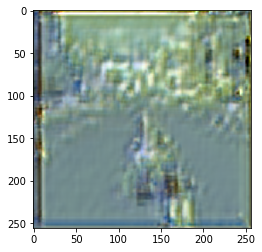

In [81]:
model.fit(img_array1,img_array,epochs =1000 , shuffle=True) #do we want to shuffle the data before each epoch
pred = model.predict(img_array)
imshow(pred[0].reshape(SIZE,SIZE,3))

Conclussion: SVD did not improve the accuracy!

# **Starting to work with Function Models**

In [65]:
layer1 = Input(shape = (8,))
layer2 = Dense(8,activation='relu')(layer1)
layer3 = Dense(8,activation='relu')(layer2)
output = Dense(1,activation='sigmoid')(layer3)
func_model = Model(inputs = layer1, outputs =output)
func_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________
